## Rasterising the coastlines from 0.01mya to 0.60 mya

In [1]:
import os
from pycoalescence import Map
import seaborn as sb # for nice plotting
import matplotlib.pyplot as plt

In [6]:
# Change this path to wherever your shapefiles are
coastlines_input_dir = os.path.join("data", "shapefiles", "historical_coastlines")
coastlines_output_dir = os.path.join("data", "rasters", "historical_coastlines")
# Define our input data
original_glacial = os.path.join("data", "rasters", "original", 
                                "0.01MYA_deBoer_global_1deg_icethickness_compressed.tif")
projected_glacial = os.path.join("data", "rasters", "original",
                                 "0.01MYA_deBoer_global_1deg_icethickness_compressed_reproj.tif")
if not os.path.exists(coastlines_output_dir):
    os.makedirs(coastlines_output_dir)

In [5]:
# Define our target geotransform
if os.path.exists(projected_glacial):
	os.remove(projected_glacial)
# Get the geotransform and projection of the glacial data (which we will try to match with the coastlines)
m_glacial = Map(original_glacial)
m_glacial.reproject_raster(x_scalar=0.1, y_scalar=0.1, dest_file=projected_glacial)
m_glacial = Map(projected_glacial)
target_geotransform = m_glacial.get_geo_transform()
target_proj = m_glacial.get_projection()

In [14]:
# This performs the actual rasterisation
for file in os.listdir(input_dir):
    coastline_shapefile = os.path.join(input_dir, file)
    file_name, file_ext = os.path.splitext(coastline_shapefile)
    # Search for files which are .shp type
    if file_ext == ".shp":
        # Get the year (in mya) of the shapefile
        year = file.split("_", 1)[0].lower()
        # Define the name of our output raster
        coastline_raster = os.path.join(coastlines_output_dir, "{}.tif".format(year))
        if not os.path.exists(coastline_raster):
            m_coastline = Map()
            # perform the rasterisation
            m_coastline.rasterise(shape_file=coastline_shapefile, raster_file=coastline_raster, 
                                  output_srs=target_proj, geo_transform=target_geotransform,
                                  x_buffer=0, y_buffer=0, width=3600, height=1800)
        

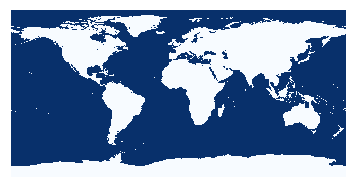

In [56]:
%matplotlib inline
m = Map(os.path.join(coastlines_output_dir, coastline_raster[0]))
m.open()
sb.heatmap(m.data, cmap="Blues_r", square=True, vmin=0, vmax=1, yticklabels=False, xticklabels=False, cbar=False)